# NLP Final Project
## Topic
Create an NLP based model to understand the polarity of review and estimate a rating based on the review provided to a movie. Post we train a model to identify the polarity of review we will try to create a regression or classification model to map the review to a rating from range of 1-10.

## Loading and formating of input data (Step 0)

In [1]:
# import os
# import shutil
# import glob

# # creating new folders for sorting the ratings
# for i in range(1,11):
#     try:
#         os.mkdir(f'./Cleaned_dataset/ratings_' + str(i))
#     except:
#         files = glob.glob('./Cleaned_dataset/ratings_' + str(i)+'/*')
#         os.remove(files)

# # filtering and copying negative reviews
# neg_path = './Project Dataset/aclImdb/train/neg/'
# neg_files = os.listdir(neg_path)
# flip = False
# for file_name in neg_files:
#     try:
#         # copying review to their respective rating folder
#         rating = file_name.split('_')[1].split('.')[0]
#         if rating == '4':
#             if(not flip):
#                 shutil.copy2(neg_path + file_name,'./Cleaned_dataset/ratings_4/'+ file_name)
#                 flip = True
#             else:
#                 shutil.copy2(neg_path + file_name,'./Cleaned_dataset/ratings_5/'+ file_name)
#                 flip = False
#         else:
#             shutil.copy2(neg_path + file_name,'./Cleaned_dataset/ratings_' + rating +'/' + file_name)
#     except:
#         print(neg_path + file_name)
        
# # filtering and copying positive reviews
# pos_path = './Project Dataset/aclImdb/train/pos/'
# pos_files = os.listdir(pos_path)
# flip = False
# for file_name in pos_files:
#     try:
#         # copying review to their respective rating folder
#         rating = file_name.split('_')[1].split('.')[0]
#         if rating == '7':
#             if(not flip):
#                 shutil.copy2(pos_path + file_name,'./Cleaned_dataset/ratings_7/' + file_name)
#                 flip = True
#             else:
#                 shutil.copy2(pos_path + file_name,'./Cleaned_dataset/ratings_6/' + file_name)
#                 flip = False
#         else:
#             shutil.copy2(pos_path + file_name,'./Cleaned_dataset/ratings_' + rating + '/' + file_name)
#     except:
#         print(pos_path + file_name)

## Load data in to data frames (Step 0)

In [9]:
# %%time
# import pandas as pd
# import os

# data_set = pd.DataFrame(columns=['Rating','Review'])
# ratings_folder_path = os.listdir('./Cleaned_dataset/')
# if 'tokenized_words.csv' in ratings_folder_path:
#     ratings_folder_path.remove('tokenized_words.csv')
# if 'vectorized_words.csv' in ratings_folder_path:
#     ratings_folder_path.remove('vectorized_words.csv')

# for folder in ratings_folder_path:
#     rating = folder.split('_')
#     review_files = os.listdir('./Cleaned_dataset/' + folder + '/')
#     for review in review_files:
#         try:
#             fp = open('./Cleaned_dataset/' + folder + '/' + review,'r')
#             review_data = fp.read()
#             rating_number = rating[1]
#             data_set = data_set.append(pd.Series([rating_number,review_data], index=data_set.columns),ignore_index=True)
#             fp.close()
#         except:
#             # try except to deal with error in file reading due to codec issues
#             pass

# print(data_set.head(10))

  Rating                                             Review
0      1  Sorry everyone,,, I know this is supposed to b...
1      1  When I was little my parents took me along to ...
2      1  This film is mediocre at best. Angie Harmon is...
3      1  This film is one giant pant load. Paul Schrade...
4      1  This movie must be in line for the most boring...
5      1  A worn-out plot of a man who takes the rap for...
6      1  Shame on Yash Raj films and Aditya Chopra who ...
7      1  If this is a 2008 product from one of the bigg...
8      1  The action in this movie beats Sunny bhai in G...
9      1  I had no idea what the film is about before I ...
Wall time: 1min 5s


## Pre-processing data_set (Step 0)
### Removing punctuations, Stop words and Lemmatizing

In [ ]:
# %%time
# import nltk
# # download wordnet if required
# # nltk.download('wordnet')
# # download stopwords if required
# # nltk.download('stopwords')
# # loading English stop words  
# stop_words = nltk.corpus.stopwords.words('english')
# import string
# import re

# # Basic cleaning
# def cleanAndTokenize(review):
#     # removing punctuations
#     non_punc_words = "".join([character for character in review if character not in string.punctuation])
    
#     non_punc_words = non_punc_words.strip()
    
#     # tokenizing reviews
#     list_of_token = re.split('\W+',non_punc_words)
    
#     # removing stop words
#     tokens = [word for word in list_of_token if word not in stop_words]
    
#     return tokens

# # converting words to lower case.
# data_set['Review'] = data_set['Review'].apply(lambda review : cleanAndTokenize(str(review).lower()))

# # using nltk's wordnet lemmatizer
# word_net_lemma = nltk.WordNetLemmatizer()

# def lemmatize_data(token_list):
#     tokens = [word_net_lemma.lemmatize(word) for word in token_list]
#     return tokens

# data_set['Review'] = data_set['Review'].apply(lambda review : lemmatize_data(review))

# # un-comment to write data to file
# # data_set.to_csv('./Cleaned_dataset/tokenized_words.csv',index = False, header=True)

## Vectorizing reviews using TF-IDF. (Step 0)

In [1]:
# %%time
# import pandas as pd
# import pickle
# from sklearn.feature_extraction.text import TfidfVectorizer
# import string
# import re
# import nltk
# # using nltk's wordnet lemmatizer
# word_net_lemma = nltk.WordNetLemmatizer()

# data_set = pd.read_csv('./Cleaned_dataset/tokenized_words.csv')

# print(data_set.head())

# def clean_review(review):
#     non_punc_words = "".join([character for character in review if character not in string.punctuation])
#     list_of_token = re.split('\W+',non_punc_words)
#     tokens = [word_net_lemma.lemmatize(word) for word in list_of_token]
#     return tokens

# tfidf_vectorize = TfidfVectorizer(analyzer=clean_review)
# vectorized_review = tfidf_vectorize.fit_transform(data_set['Review'])

# pickle.dump(tfidf_vectorize,open('./pickle_tfidf/tfidf.pickle','wb'))
# vectorized_review_df = pd.DataFrame(vectorized_review.toarray())
# vectorized_review_df.columns = tfidf_vectorize.get_feature_names()
# print(vectorized_review_df.head())

# pickle.dump(vectorized_review,open('./pickle_tfidf/vectorized_review.pickle','wb'))

# # un-comment to write data to file
# # data_set.to_csv('./Cleaned_dataset/vectorized_words.csv',index = False, header=True)

   Rating                                             Review
0       1  ['sorry', 'everyone', 'know', 'supposed', 'art...
1       1  ['little', 'parent', 'took', 'along', 'theater...
2       1  ['film', 'mediocre', 'best', 'angie', 'harmon'...
3       1  ['film', 'one', 'giant', 'pant', 'load', 'paul...
4       1  ['movie', 'must', 'line', 'boring', 'movie', '...
     0   00  000  0000000000001  00001  00015  000s  001  003830  006  ...  \
0  0.0  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  ...   
1  0.0  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  ...   
2  0.0  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  ...   
3  0.0  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  ...   
4  0.0  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  ...   

    âº   â½   â¾  âžiâžek    ã  ã¼ber  ãœvegtigris  ãšxtase    ï  œat  
0  0.0  0.0  0.0      0.0  0.0    0.0          0.0      0.0  0.0  0.0  
1  0.0  0.0  0.0     

# Load the TFIDF object (Step 1)

In [1]:
%%time
import pickle
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import re
import numpy as np
import string
import re
import nltk
# using nltk's wordnet lemmatizer
word_net_lemma = nltk.WordNetLemmatizer()

# this method is repeated because it doesn't get pickled with the tfidf object 
def clean_review(review):
    non_punc_words = "".join([character for character in review if character not in string.punctuation])
    list_of_token = re.split('\W+',non_punc_words)
    tokens = [word_net_lemma.lemmatize(word) for word in list_of_token]
    return tokens

class_data = pd.read_csv('./Cleaned_dataset/tokenized_words.csv',usecols = ['Rating'])

tfidf_object = pickle.load(open('./pickle_tfidf/tfidf.pickle','rb'))
vectorized_review_obj = pickle.load(open('./pickle_tfidf/vectorized_review.pickle','rb'))

Wall time: 1min 54s


## Predict a rating for review (Step 2)

In [4]:
# Run this cell to enter a new review, post entering the review hit enter to stop taking input.
review_input = input()

worst movie ever


In [5]:
%%time
new_in = tfidf_object.transform([review_input])
distances = euclidean_distances(vectorized_review_obj,new_in)
dict_class_label = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}

distance_set = np.unique(distances)
distance_set = sorted(distance_set)
# selected after experimenting
min_dist = distance_set[0:41]
for k in min_dist:
    list1 = np.where(distances == k)[0]
    class_label,label_count = np.unique(class_data.loc[list1,:].values,return_counts = True)
    for index,value in zip(class_label.tolist(),label_count.tolist()):
        dict_class_label[index] += value
print('max count predicted rating: ',max(dict_class_label, key=lambda key: dict_class_label[key]))

distances = euclidean_distances(vectorized_review_obj,new_in)
dict_class_label = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}

distance_set = np.unique(distances)
distance_set = sorted(distance_set)
# selected after experimenting
min_dist = distance_set[0:3]
for k in min_dist:
    list1 = np.where(distances == k)[0]
    class_label,label_count = np.unique(class_data.loc[list1,:].values,return_counts = True)
    for index,value in zip(class_label.tolist(),label_count.tolist()):
        dict_class_label[index] += value
list_of_rating = [val for val in dict_class_label if dict_class_label[val] > 0]
print('mean predicted rating: ',int(sum(list_of_rating)/len(list_of_rating)))

max count predicted rating:  1
mean predicted rating:  1
Wall time: 87.8 ms


# Performance testing

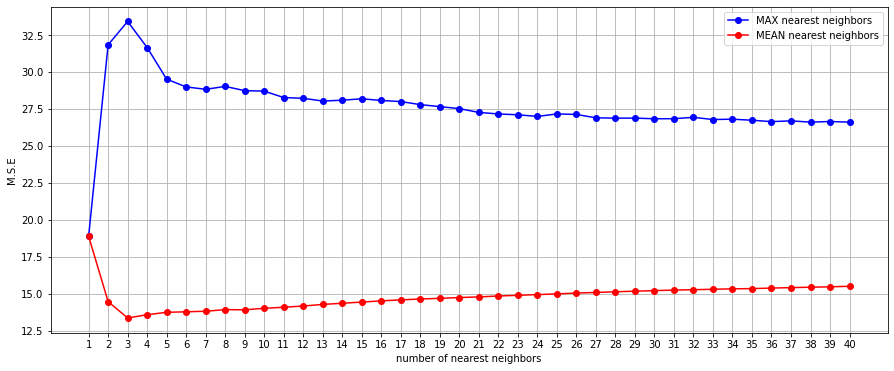

Wall time: 5h 26min 47s


In [13]:
%%time
import os
import matplotlib.pyplot as plt

neg_path = './Project Dataset/aclImdb/test/neg/'
neg_files = os.listdir(neg_path)

pos_path = './Project Dataset/aclImdb/test/pos/'
pos_files = os.listdir(pos_path)

max_nn = 41
plot_max = []
plot_mean = []

for nearest_negihbor in range(1,max_nn):
    max_predicted_rating_arr = []
    mean_predicted_rating_arr = []
    actual_rating_arr = []
    
    for file_name in pos_files:
        try:
            fp = open('./Project Dataset/aclImdb/test/pos/'+file_name,'r')
            actual_rating = int(file_name.split('_')[1].split('.')[0])
            test_review = fp.read() 
            new_in = tfidf_object.transform([test_review])
            distances = euclidean_distances(vectorized_review_obj,new_in)
            dict_class_label = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}

            distance_set = np.unique(distances)
            distance_set = sorted(distance_set)
            min_dist = distance_set[0:nearest_negihbor]
            for k in min_dist:
                list1 = np.where(distances == k)[0]
                class_label,label_count = np.unique(class_data.loc[list1,:].values,return_counts = True)
                for index,value in zip(class_label.tolist(),label_count.tolist()):
                    dict_class_label[index] += value
            actual_rating_arr.append(actual_rating)
            max_predicted_rating_arr.append(max(dict_class_label, key=lambda key: dict_class_label[key]))

            list_of_rating = [val for val in dict_class_label if dict_class_label[val] > 0]
            mean_predicted_rating_arr.append(int(sum(list_of_rating)/len(list_of_rating)))

            del fp
        except Exception:
            pass

    MSE = pd.DataFrame(columns = ['max_predicted_rating_arr','mean_predicted_rating_arr','actual_rating_arr'])
    MSE['actual_rating_arr'] = actual_rating_arr
    MSE['max_predicted_rating_arr'] = max_predicted_rating_arr
    MSE['mean_predicted_rating_arr'] = mean_predicted_rating_arr
    mean_squared_error_max = np.square(np.subtract(MSE['actual_rating_arr'],MSE['max_predicted_rating_arr'])).mean()
    mean_squared_error_mean = np.square(np.subtract(MSE['actual_rating_arr'],MSE['mean_predicted_rating_arr'])).mean()
    plot_max.append(mean_squared_error_max)
    plot_mean.append(mean_squared_error_mean)
    
# Plot the mean v/s max values
plt.figure(figsize=(15,6))
plt.plot(list(range(1, max_nn)),plot_max,'b-o', label = 'MAX nearest neighbors')
plt.plot(list(range(1, max_nn)),plot_mean,'r-o', label = 'MEAN nearest neighbors')
plt.legend(loc='upper right')
plt.xlabel('number of nearest neighbors')
plt.ylabel('M.S.E')
plt.xticks(list(range(1, max_nn)))
plt.grid()
plt.show()

# Cosine and count vectorization testing.

In [24]:
# Run this cell to enter a new review, post entering the review hit enter to stop taking input.
input_review = input()

bad movie


In [26]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

vectorizer_obj = CountVectorizer()#analyzer='word', ngram_range=(2, 2))
count_vector_obj = vectorizer_obj.fit_transform(data_set['Review'])

class_data = pd.DataFrame(data_set['Rating'],dtype='int')


input_count_obj = vectorizer_obj.transform([input_review])

cosine_distance_list = cosine_distances(count_vector_obj,input_count_obj)

dict_class_label = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}

distance_set = np.unique(cosine_distance_list)
distance_set = sorted(distance_set)
min_dist = distance_set[0:1]
for k in min_dist:
    list1 = np.where(cosine_distance_list == k)[0]
    class_label,label_count = np.unique(class_data.loc[list1,:].values,return_counts = True)
    for index,value in zip(class_label.tolist(),label_count.tolist()):
        dict_class_label[index] += value
print('max count predicted rating: ',max(dict_class_label, key=lambda key: dict_class_label[key]))

list_of_rating = [val for val in dict_class_label if dict_class_label[val] > 0]
print('mean predicted rating: ',int(sum(list_of_rating)/len(list_of_rating)))

max count predicted rating:  1
mean predicted rating:  1
Wall time: 5.2 s
